In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ber  = np.array([0, 214, 279, 610, 596, 237])
dre  = np.array([214, 0, 492, 533, 496, 444])
ham  = np.array([279, 492, 0, 520, 772, 140])
kob  = np.array([610, 533, 520, 0, 521, 687])
mue  = np.array([596, 496, 772, 521, 0, 771])
ros  = np.array([237, 444, 140, 687, 771, 0])

dist = np.column_stack([ber, dre, ham, kob, mue, ros])

In [ ]:
a = (dist**2) * (-0.5)
i = np.diag([1]*6)
u = [1]*6
u = np.reshape(u, (6, 1))
h = i - (1/6 * (u @ u.T))
b = h @ a @ h

eigvals, eigvecs = np.linalg.eig(b)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
sqrt_eigvals = np.sqrt(np.maximum(eigvals[:2], 0))
xx1 = eigvecs[:, :2] @ np.diag(sqrt_eigvals)


x = np.cos(np.pi/2)
y = np.sin(np.pi/2)
z = -np.sin(np.pi/2)
r = np.array([[x,z], [y,x]])
xx2 = np.dot(xx1, r)
xx2[:,0] = xx2[:,0] + 500
xx2[:,1] = xx2[:,1] + 500

cities = ["Berlin", "Dresden", "Hamburg", "Koblenz", "Muenchen", "Rostock"]

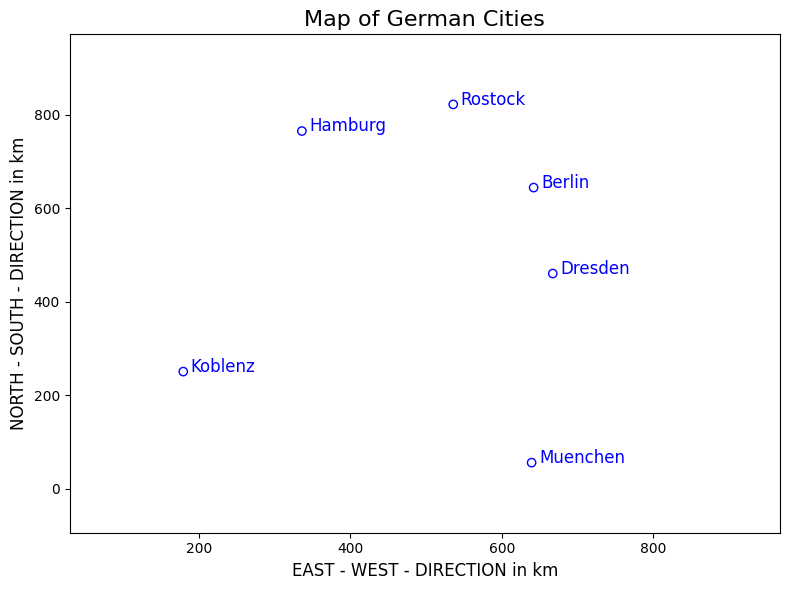

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(xx2[:, 0], xx2[:, 1], color="blue", marker='o', facecolors='none')

center_x = (xx2[:, 0].min() + xx2[:, 0].max()) / 2
center_y = (xx2[:, 1].min() + xx2[:, 1].max()) / 2
rx = np.abs(xx2[:, 0] - center_x).max() + 150
ry = np.abs(xx2[:, 1] - center_y).max() + 150

plt.xlim(center_x - rx, center_x + rx +150)
plt.ylim(center_y - ry, center_y + ry)

plt.xlabel("EAST - WEST - DIRECTION in km", fontsize=12)
plt.ylabel("NORTH - SOUTH - DIRECTION in km", fontsize=12)
plt.title("Map of German Cities", fontsize=16)
city_names = ["Berlin", "Dresden", "Hamburg", "Koblenz", "Muenchen", "Rostock"]
for i, name in enumerate(city_names):
    plt.text(xx2[i, 0]+10, xx2[i, 1]+10, name, color="blue", fontsize=12, ha='left', va='center')
plt.tight_layout()
plt.savefig("MVAMDScity2.png", dpi=144, transparent=True)
plt.show()